<a href="https://colab.research.google.com/github/Aryan49SM/Convolution_Neural_Network/blob/master/1_CNN_Tensorflow_Rooms_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the dataset

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download ibrahimalobaid/rooms-classification

Dataset URL: https://www.kaggle.com/datasets/ibrahimalobaid/rooms-classification
License(s): Attribution 4.0 International (CC BY 4.0)
rooms-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip rooms-classification.zip

Archive:  rooms-classification.zip
replace rooms_dataset/bed_room/apartment-2094734__340.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: rooms_dataset/bed_room/apartment-2094734__340.jpg  
  inflating: rooms_dataset/bed_room/apartment-4744139__340.jpg  
  inflating: rooms_dataset/bed_room/architecture-2141065__340.jpg  
  inflating: rooms_dataset/bed_room/architecture-modern-house-beautiful-interiors-260nw-278631791.jpg  
  inflating: rooms_dataset/bed_room/baby-1266117__340.jpg  
  inflating: rooms_dataset/bed_room/bath-753272__340.jpg  
  inflating: rooms_dataset/bed_room/bed-1048194__340.jpg  
  inflating: rooms_dataset/bed_room/bed-1232590__340.jpg  
  inflating: rooms_dataset/bed_room/bed-1303451__340 (1).jpg  
  inflating: rooms_dataset/bed_room/bed-1303451__340.jpg  
  inflating: rooms_dataset/bed_room/bed-142516__340.jpg  
  inflating: rooms_dataset/bed_room/bed-1846251__340.jpg  
  inflating: rooms_dataset/bed_room/bed-1853443__340.jpg  
  inflating: rooms_dataset/be

## Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
dataset_path = '/content/rooms_dataset'
room_types = os.listdir(dataset_path)
print(room_types)

['living_room', 'bed_room', 'dining_room']


In [ ]:
rooms = []

for item in room_types:
  all_rooms = os.listdir(dataset_path + '/' + item)
  # print(all_rooms)
  # Add item to the list
  for room in all_rooms:
    rooms.append((item, str(dataset_path + '/' + item + '/' + room)))

In [ ]:
# Dataframe
rooms_df = pd.DataFrame(data=rooms, columns=['room_type', 'image_path'])
print(rooms_df.head())
print(rooms_df.tail())

     room_type                                         image_path
0  living_room  /content/rooms_dataset/living_room/profile-150...
1  living_room  /content/rooms_dataset/living_room/pexels-phot...
2  living_room  /content/rooms_dataset/living_room/living-room...
3  living_room  /content/rooms_dataset/living_room/house-75327...
4  living_room  /content/rooms_dataset/living_room/pexels-phot...
       room_type                                         image_path
388  dining_room  /content/rooms_dataset/dining_room/architectur...
389  dining_room  /content/rooms_dataset/dining_room/rice-517351...
390  dining_room  /content/rooms_dataset/dining_room/chair-19973...
391  dining_room  /content/rooms_dataset/dining_room/kitchen-389...
392  dining_room  /content/rooms_dataset/dining_room/dining-room...


In [ ]:
# total number of rooms in dataset
print('Total number of rooms in dataset: ', len(rooms_df))

Total number of rooms in dataset:  393


In [ ]:
# Check how many samples for each category are present
room_count = rooms_df['room_type'].value_counts()

print('room count: ')
print(room_count)

room count: 
room_type
bed_room       159
living_room    148
dining_room     86
Name: count, dtype: int64


## Resize images in 60*60 dimension

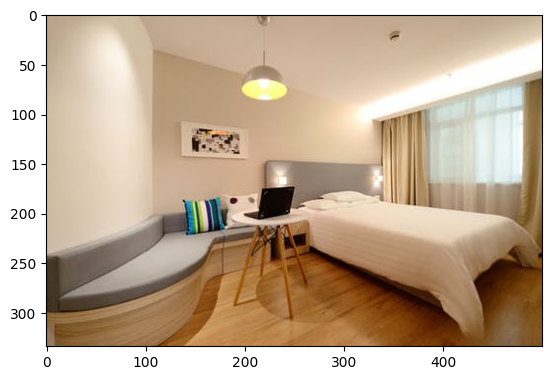

In [ ]:
# print image
img1 = plt.imread(rooms_df['image_path'][200])
plt.imshow(img1)

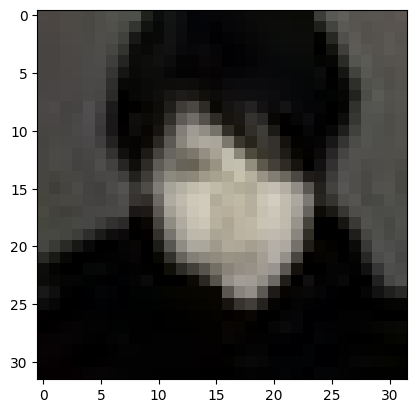

In [ ]:
img2 = plt.imread(rooms_df['image_path'][70])
plt.imshow(img2)

In [ ]:
import cv2
im_size = 60

images = []
labels = []

for i in room_types:
  data_path = dataset_path + '/' + str(i)       # entered in 1st folder and then 2nd then 3rd folder

  filenames = [i for i in os.listdir(data_path)]
  # print(filenames) will get names of all images

  for f in filenames:
    img = cv2.imread(data_path + '/' + f)       # reading that image as array & get image as an array
    img = cv2.resize(img, (im_size, im_size))   # resize the image
    images.append(img)
    labels.append(i)


In [ ]:
print(type(images[0]))
print(type(images))

<class 'numpy.ndarray'>
<class 'list'>


In [ ]:
# Transform the image array to a numpy type
images = np.array(images)
images = images.astype('float32') / 255.0
images.shape

(393, 60, 60, 3)

In [ ]:
print(type(images[0]))
print(type(images))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
y = rooms_df['room_type'].values
print(y[:5])

['living_room' 'living_room' 'living_room' 'living_room' 'living_room']


In [ ]:
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)
print(y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
y = y.reshape(-1,1)
onehotencoder = OneHotEncoder()
Y = onehotencoder.fit_transform(y).toarray()
print(Y)
print(Y.shape)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
(393, 3)


In [ ]:
print(images.shape)
print(Y.shape)

(393, 60, 60, 3)
(393, 3)


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, Y = shuffle(images, Y, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(images, Y, test_size=0.05, random_state=415)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(373, 60, 60, 3)
(373, 3)
(20, 60, 60, 3)
(20, 3)


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
num_classes = 3

# flattened image
img_rows, img_cols = 60, 60
input_shape = (img_rows, img_cols, 3)

# architecture hyper-parameters
learning_rate = 0.001
epochs = 10
batch_size = 16

In [ ]:
image_size = 60
num_channels = 3

x = tf.placeholder(tf.float32, shape=[None, image_size, image_size, num_channels])
y_ = tf.placeholder(tf.float32, shape=[None, num_classes])

print('Shape of placeholder:', x.shape, y_.shape)

Shape of placeholder: (?, 60, 60, 3) (?, 3)


## Working with Convolution Neural Network

In [ ]:
def cov2d(x, W, b, strides=1):
  x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
  x = tf.nn.bias_add(x,b)
  return tf.nn.relu(x)

In [ ]:
def maxpool2d(x, k=2):
  return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

In [ ]:
weights = {
    'w1' : tf.Variable(tf.random_normal([5, 5, 3, 32]), name='w1'),
    'w2' : tf.Variable(tf.random_normal([5, 5, 32, 64]), name='w2'),
    'w3' : tf.Variable(tf.random_normal([5, 5, 64, 128]), name='w3'),
    'wd1' : tf.Variable(tf.random_normal([8 * 8 * 128, 2048]), name='wd1'),
    'wout' : tf.Variable(tf.random_normal([2048, num_classes]), name='wout')
}

In [ ]:
biases = {
    'b1' : tf.Variable(tf.random_normal([32]), name='b1'),
    'b2' : tf.Variable(tf.random_normal([64]), name='b2'),
    'b3' : tf.Variable(tf.random_normal([128]), name='b3'),
    'bd1' : tf.Variable(tf.random_normal([2048]), name='bd1'),
    'bout' : tf.Variable(tf.random_normal([num_classes]), name='bout')
}

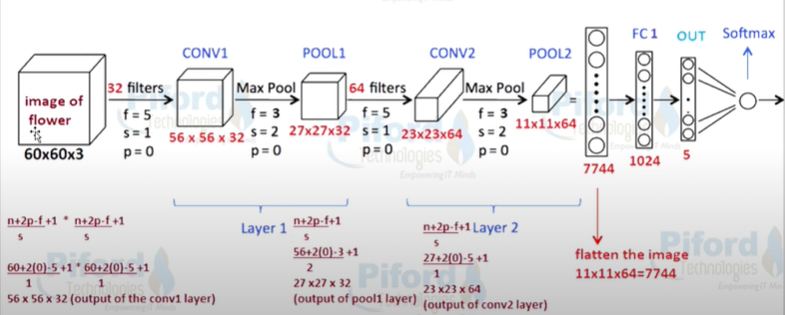

In [ ]:
def conv_net(x, weights, biases):

  # reshape input to 60*60*3 size
  x = tf.reshape(x, shape=[-1, 60, 60, 3])

  print('############################################################')
  print('Size of X is ')
  print(x.shape)

  conv1 = cov2d(x, weights['w1'], biases['b1'])
  conv1 = maxpool2d(conv1, k=2)
  print('############################################################')
  print('Size after 1st conv and pooling layer is ')
  print(conv1.shape)

  # Convolution layer
  conv2 = cov2d(conv1, weights['w2'], biases['b2'])
  conv2 = maxpool2d(conv2, k=2)
  print('############################################################')
  print('Size after 2nd conv and pooling layer is ')
  print(conv2.shape)

  # third conv layer
  conv3 = cov2d(conv2, weights['w3'], biases['b3'])
  conv3 = maxpool2d(conv3, k=2)
  print('############################################################')
  print('Size after 3rd conv and pooling layer is ')
  print(conv3.shape)

  # fully connected layer
  # reshape conv3 output to fit fully connected layer input = 8*8*128 = 8192
  fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
  print('############################################################')
  print('Shape after flattening the image ')
  print(fc1)


  fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
  fc1 = tf.nn.relu(fc1)
  print('############################################################')
  print('Shape after fully connected layer is ')
  print(fc1)

  # output, class prediction
  # finally we multiply the fully connected layer with the weights and add a bias term
  out = tf.add(tf.matmul(fc1, weights['wout']), biases['bout'])
  print('############################################################')
  print('Output layer is ')
  print(out.shape)

  return out

In [ ]:
model = conv_net(x, weights, biases)
print(model)

############################################################
Size of X is 
(?, 60, 60, 3)
############################################################
Size after 1st conv and pooling layer is 
(?, 30, 30, 32)
############################################################
Size after 2nd conv and pooling layer is 
(?, 15, 15, 64)
############################################################
Size after 3rd conv and pooling layer is 
(?, 8, 8, 128)
############################################################
Shape after flattening the image 
Tensor("Reshape_6:0", shape=(?, 8192), dtype=float32)
############################################################
Shape after fully connected layer is 
Tensor("Relu_14:0", shape=(?, 2048), dtype=float32)
############################################################
Output layer is 
(?, 3)
Tensor("Add_5:0", shape=(?, 3), dtype=float32)


In [ ]:
# Define loss and optimizer

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=y_))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [ ]:
# Initializing the variables
init = tf.global_variables_initializer()

In [ ]:
cost_history = []
n_epochs = 10

# Execution
sess = tf.Session()
sess.run(init)

for i in range(n_epochs):
  a, c = sess.run([optimizer, cost], feed_dict={x: X_train, y_: y_train})
  cost_history = np.append(cost_history, c)
  print('Epoch: ', i, ' - ', 'cost = ', c)

Epoch:  0  -  cost =  7645697.5
Epoch:  1  -  cost =  2833592.0
Epoch:  2  -  cost =  4369235.5
Epoch:  3  -  cost =  5273550.0
Epoch:  4  -  cost =  5813058.5
Epoch:  5  -  cost =  4438884.5
Epoch:  6  -  cost =  4390030.5
Epoch:  7  -  cost =  3242836.8
Epoch:  8  -  cost =  1747488.8
Epoch:  9  -  cost =  1534605.2


In [ ]:
import scipy as sp

if sp.sparse.issparse(y_test):
    test_y = y_test.toarray()
else:
    test_y = y_test

print(test_y)
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y_, 1))
print(correct_prediction)

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Tensor("Equal_1:0", shape=(?,), dtype=bool)


In [ ]:
print('Accuracy: ', sess.run(accuracy, feed_dict={x: X_test, y_: test_y}))

Accuracy:  0.3
